In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics

### LOADING CSV FILES IN PANDAS DATAFRAME

In [124]:
sales_csv = pd.read_csv("SalesBasedOnAdvertising.csv")

In [125]:
df_marketing = pd.DataFrame(sales_csv)

In [126]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales
0,1,219.0,NaN,34.5,48.9
1,2,230.1,37.8,69.2,22.1
2,3,44.5,39.3,45.1,10.4
3,4,17.2,45.9,69.3,9.3
4,5,151.5,41.3,58.5,18.5


In [127]:
df_marketing.dtypes

Sno            int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All the columns of the dataframe contain datatype as per the requirement.

### Cleaning data

In [128]:
df_marketing.isnull().sum()

Sno          0
TV           0
radio        1
newspaper    0
sales        0
dtype: int64

In [129]:
df_marketing.shape

(204, 5)

In [130]:
np.sum(df_marketing['sales']==0)

2

In [131]:
df_marketing[df_marketing['sales'] == 0]

,Sno,TV,radio,newspaper,sales
97,98,0.0,18.0,67.0,0.0
121,122,69.4,3.0,34.0,0.0


In [132]:
df_marketing = df_marketing.drop(df_marketing[df_marketing['sales'] == 0].index)

In [133]:
df_marketing.shape

(202, 5)

In [134]:
df_marketing = df_marketing.reset_index()

In [135]:
np.sum(df_marketing['TV']==0)

0

In [136]:
np.sum(df_marketing['radio']==0)

1

In [137]:
df_marketing[df_marketing['radio'] == 0]

,index,Sno,TV,radio,newspaper,sales
129,131,132,80.2,0.0,9.2,8.8


In [138]:
np.mean(df_marketing['radio'])

23.247761194029874

In [139]:
del df_marketing['index']

In [140]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales
0,1,219.0,NaN,34.5,48.9
1,2,230.1,37.8,69.2,22.1
2,3,44.5,39.3,45.1,10.4
3,4,17.2,45.9,69.3,9.3
4,5,151.5,41.3,58.5,18.5


In [141]:
df_marketing.at[129,'radio']

0.0

In [142]:
np.mean(df_marketing['radio'])

23.247761194029874

In [143]:
df_marketing.at[129, 'radio'] = np.mean(df_marketing['radio'])

In [144]:
np.sum(df_marketing['radio']==0)

0

In [145]:
np.sum(df_marketing['newspaper']==0)

0

In [146]:
df_marketing.isnull().sum()

Sno          0
TV           0
radio        1
newspaper    0
sales        0
dtype: int64

In [147]:
df_marketing = df_marketing.dropna(axis = 0)

In [148]:
df_marketing.reset_index(drop = True, inplace = True)

In [149]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales
0,2,230.1,37.8,69.2,22.1
1,3,44.5,39.3,45.1,10.4
2,4,17.2,45.9,69.3,9.3
3,5,151.5,41.3,58.5,18.5
4,6,180.8,10.8,58.4,12.9


Our data is cleaned now

### Performing explanatory analysis

In [150]:
df_marketing.shape

(201, 5)

In [151]:
df_marketing.describe()

,Sno,TV,radio,newspaper,sales
count,201.000000,201.000000,201.000000,201.000000,201.000000
mean,102.930348,147.355721,23.363422,30.496517,13.986567
std,59.021819,85.754386,14.719473,21.739387,5.229270
min,2.000000,0.700000,0.300000,0.300000,1.600000
25%,52.000000,74.700000,10.100000,12.800000,10.300000
50%,103.000000,149.800000,23.247761,25.600000,12.900000
75%,154.000000,218.500000,36.500000,45.100000,17.400000
max,204.000000,296.400000,49.600000,114.000000,27.000000


In [152]:
df_marketing.dtypes

Sno            int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [153]:
df_marketing.median()

Sno          103.000000
TV           149.800000
radio         23.247761
newspaper     25.600000
sales         12.900000
dtype: float64

### Visualising the data

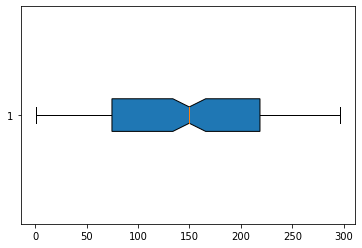

In [154]:
plt.boxplot(df_marketing['TV'], vert= False, notch = True, patch_artist=True)
plt.show()

The box plot for cost of advertising on TV shows that the value lies between around zero to 300 and the 25th percentile and 75th percentile are at around 75 and 220. 
The median of the data lies at about 150.

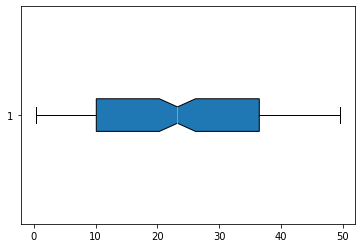

In [155]:
plt.boxplot(df_marketing['radio'], vert= False, notch = True, patch_artist=True)
plt.show()

The box plot for cost of advertising on radio shows that the value lies between around 0 to 50 and the 25th percentile and 75th percentile are at around 10 and 37. 
The median of the data lies at about 23.

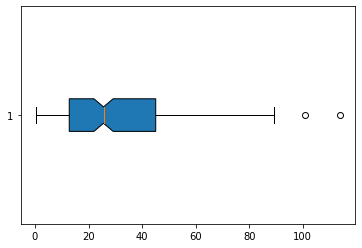

In [156]:
plt.boxplot(df_marketing['newspaper'], vert= False, notch = True, patch_artist=True)
plt.show()

The box plot for cost of advertising on newspapers shows that the value lies between around 0 to 90 and there are two outliers which are at around 100 and 115. The 25th percentile and 75th percentile are at around 12 and 45. 
The median of the data lies at about 25.

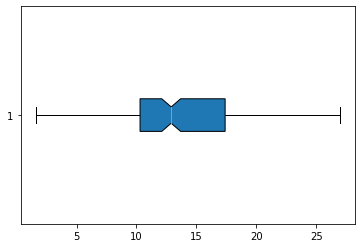

In [157]:
plt.boxplot(df_marketing['sales'], vert= False, notch = True, patch_artist=True)
plt.show()

The box plot for sales based on all advertisement shows that the value lies between around 1 to 27 and the 25th percentile and 75th percentile are at around 10 and 17. 
The median of the data lies at about 12.5.

In [158]:
sales = np.array(df_marketing[['sales','TV','radio','newspaper']])

In [159]:
sales[:10]

array([[ 22.1, 230.1,  37.8,  69.2],
       [ 10.4,  44.5,  39.3,  45.1],
       [  9.3,  17.2,  45.9,  69.3],
       [ 18.5, 151.5,  41.3,  58.5],
       [ 12.9, 180.8,  10.8,  58.4],
       [  7.2,   8.7,  48.9,  75. ],
       [ 11.8,  57.5,  32.8,  23.5],
       [ 13.2, 120.2,  19.6,  11.6],
       [  4.8,   8.6,   2.1,   1. ],
       [ 10.6, 199.8,   2.6,  21.2]])

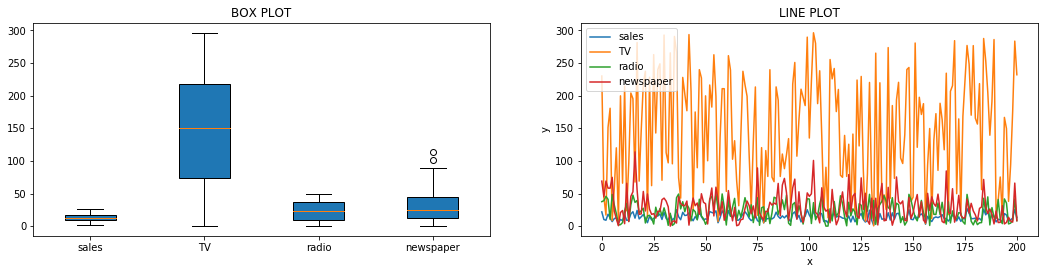

In [160]:
plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((4,2), (0,0))
ax1.boxplot(sales, patch_artist = True)
ax1 = plt.xticks([1,2,3,4], ['sales', 'TV','radio', 'newspaper'])
ax1 = plt.title('BOX PLOT')
ax2 = plt.subplot2grid((4,2),(0,1))
ax2 = plt.plot(sales)
ax2 = plt.xlabel('x')
ax2 = plt.ylabel('y')
ax2 = plt.title('LINE PLOT')
plt.legend(labels = ['sales', 'TV', 'radio', 'newspaper'], loc = 'upper left')
plt.show()

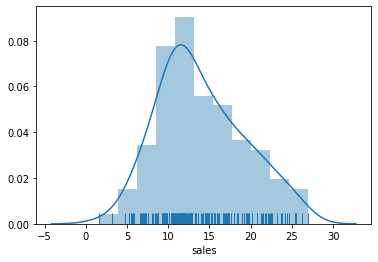

In [161]:
sns.distplot(df_marketing['sales'], rug = True)

By the above Distribution Plot we see that most of the sales value is in the range of 10 lacs to 13 13 lacs.

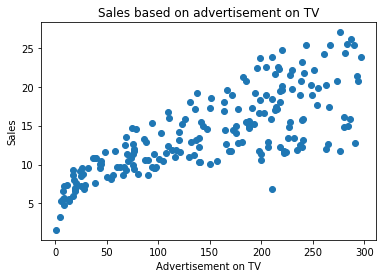

In [162]:
plt.scatter(df_marketing['TV'], df_marketing['sales'])
plt.title('Sales based on advertisement on TV')
plt.xlabel('Advertisement on TV')
plt.ylabel('Sales')
plt.show()

We can clearly see that sales increases directly  with the money spent on advertisement on the TV.

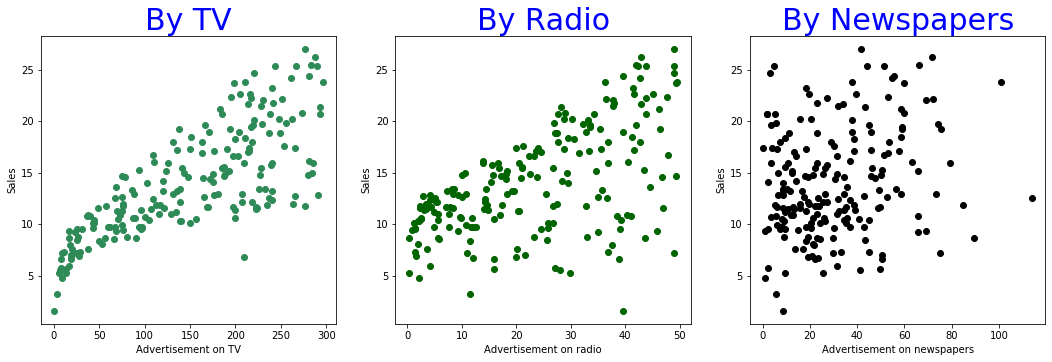

In [163]:
plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((3,3), (0,0))
ax1.scatter(df_marketing['TV'], df_marketing['sales'], color = 'seagreen')
ax1 = plt.xlabel('Advertisement on TV')
ax1 = plt.ylabel('Sales')
ax1 = plt.title('By TV', fontsize = 30, color = 'b')
ax2 = plt.subplot2grid((3,3), (0,1))
ax2.scatter(df_marketing['radio'], df_marketing['sales'], color = 'darkgreen')
ax2 = plt.xlabel('Advertisement on radio')
ax2 = plt.ylabel('Sales')
ax2 = plt.title('By Radio', fontsize = 30, color = 'b')
ax3 = plt.subplot2grid((3,3), (0,2))
ax3.scatter(df_marketing['newspaper'], df_marketing['sales'], color = 'black')
ax3 = plt.xlabel('Advertisement on newspapers')
ax3 = plt.ylabel('Sales')
ax3 = plt.title('By Newspapers', fontsize = 30, color = 'b')

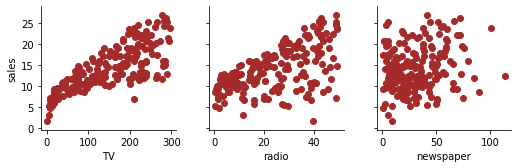

In [164]:
s = sns.PairGrid(df_marketing, x_vars = ['TV', 'radio', 'newspaper'], y_vars = ['sales'])
s.map(plt.scatter, color = 'brown')
plt.show()

### Creating Prediction Model using Simple Linear Regression

In [165]:
df_marketing['TotalAdvt'] = df_marketing['TV'] + df_marketing['newspaper'] + df_marketing['radio']

In [166]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales,TotalAdvt
0,2,230.1,37.8,69.2,22.1,337.1
1,3,44.5,39.3,45.1,10.4,128.9
2,4,17.2,45.9,69.3,9.3,132.4
3,5,151.5,41.3,58.5,18.5,251.3
4,6,180.8,10.8,58.4,12.9,250.0


In [167]:
from sklearn.model_selection import train_test_split

In [181]:
x = df_marketing[['TotalAdvt']]
y = df_marketing['sales']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

In [182]:
from sklearn import linear_model, metrics

In [183]:
simple_model = linear_model.LinearRegression()

In [184]:
simple_model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
print("The intercept of regression line is",simple_model.intercept_)
print("The slope of regression line is",simple_model.coef_[0])

The intercept of regression line is 4.21021172643732
The slope of regression line is 0.04809609696956604


In [186]:
print('R-square value =', simple_model.score(train_x, train_y))

R-square value = 0.7345498924479834


We can see that the slope of the regression Line is very less hence we can say that the regression line is very flat and almost parallel to the x-axis.

In [187]:
m = simple_model.coef_[0]
c = simple_model.intercept_

Mathematical formula to predict sales value =>
        
        sales = m * (Total Cost On Advertisement) + c

Therefore, the predicted sales for Cost on advertisement as Rs. 50,000 will be :- m * 50 + c

In [196]:
print('The predicted sales when the expense on advertisement is Rs. 50,000 =', m * 50 + c)

The predicted sales when the expense on advertisement is Rs. 50,000 = 6.6150165749156224


In [210]:
print(simple_model.predict([[50]]))

[6.61501657]


In [189]:
pred_y = simple_model.predict(test_x)

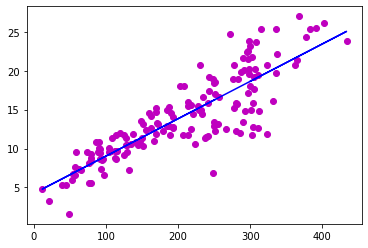

In [190]:
plt.scatter(train_x, train_y, color = 'm')
plt.plot(train_x, m * train_x + c, color = 'b')

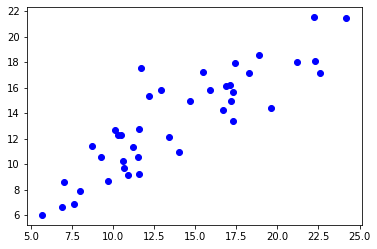

In [191]:
plt.scatter(test_y, pred_y, color = 'b')

We can see that the prediction is good upto some extent but not that good as the prediction scatters more than previous plot.

### Multivariate Prediction Model Using Linear Regression

In [193]:
X = df_marketing[['TV', 'radio','newspaper']]

In [194]:
Train_x, Test_x, Train_y, Test_y = train_test_split(X, y, test_size = 0.2)

In [197]:
multi_model = linear_model.LinearRegression()

In [198]:
multi_model.fit(Train_x, Train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
print("The intercept of regression line is",multi_model.intercept_)
print("The slope of regression line is",multi_model.coef_)

The intercept of regression line is 2.683553135146626
The slope of regression line is [0.04677516 0.18505867 0.0025604 ]


In [206]:
print('R-square value =', multi_model.score(Train_x, Train_y))

R-square value = 0.8842817965278661


We can clearly see that the R-square value in Multivariate regression has increased.
Therefore, this model fits the data better than simple model.

In [218]:
M = np.array(multi_model.coef_)
C = multi_model.intercept_

Mathematical formula to predict sales value =>
        
        sales = M[0] * (Total Cost On Advertisement by TV) + M[1] * (Total Cost On Advertisement by radio) + M[2] * 
        (Total Cost On Advertisement by newspapers) + C

Predict Sales for the below mentioned Expenditures
    i) tv Rupees 90000, radio Rupees 3000 and newspaper Rupees 45000
    ii) tv Rupees 290000 and newspaper Rupees 80000

In [221]:
print("In 1st Case :-", M[0] * 90 + M[1] * 3 + M[2] * 45 + C)
print("In 2nd Case :-", M[0] * 290 + M[1] * 0 + M[2] * 80 + C)

In 1st Case :- 7.563711617769175
In 2nd Case :- 16.453181840284586


In [228]:
print(multi_model.predict([[90, 3, 45]]))
print(multi_model.predict([[290, 0, 80]]))

[7.56371162]
[16.45318184]


In [229]:
Pred_y = multi_model.predict(Test_x)

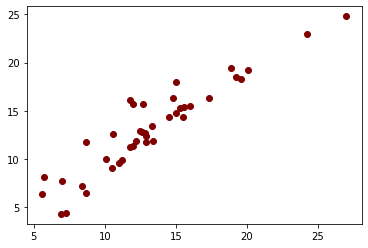

In [230]:
plt.scatter(Test_y, Pred_y, color = 'maroon')

We can see that the prediction is way better than the previous one as the scattering is less.
The R-square value is more than before that shows a better fit to tha data.

### Model Performance

In [235]:
simple_y = simple_model.predict(df_marketing[['TotalAdvt']])
multi_y = multi_model.predict(df_marketing[['TV', 'radio', 'newspaper']])

In [243]:
print("Error using Simple Model :-", metrics.mean_squared_error(df_marketing['sales'], simple_y))
print("Error using Multivariate Model :-", metrics.mean_squared_error(df_marketing['sales'], multi_y))

Error using Simple Model :- 7.1261162234539
Error using Multivariate Model :- 3.2265876203746413


The error using Multivariate Model is less than the simple Model hence we can say that Multivariate Model is better.